### PDF Data Type
- Comment: %
- Literal: ( )
- Hex: < >
- Name: /, # ord
- Array: [ ]
- Dictionary: << key value key value >>
- Indirect: n1 n2 R...
- Steam: stream ~ endtream

In [1]:
import os
import pickle

import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from jupyterthemes import jtplot
jtplot.style('grade3')

In [3]:
MAL_PATH = r'D:\Source\pdf\Malicious_PDF'
BEN_PATH = r'D:\Source\pdf\Benign_PDF'

### Steam Length Distribution

In [4]:
ben_lengths = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\ben'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    if data['body'][i]['actual_length'] > 0:
                        ben_lengths.append(data['body'][i]['actual_length'])

  0%|          | 0/103567 [00:00<?, ?it/s]

In [5]:
mal_lengths = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\mal'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    if data['body'][i]['actual_length'] > 0:
                        mal_lengths.append(data['body'][i]['actual_length'])

  0%|          | 0/10648 [00:00<?, ?it/s]

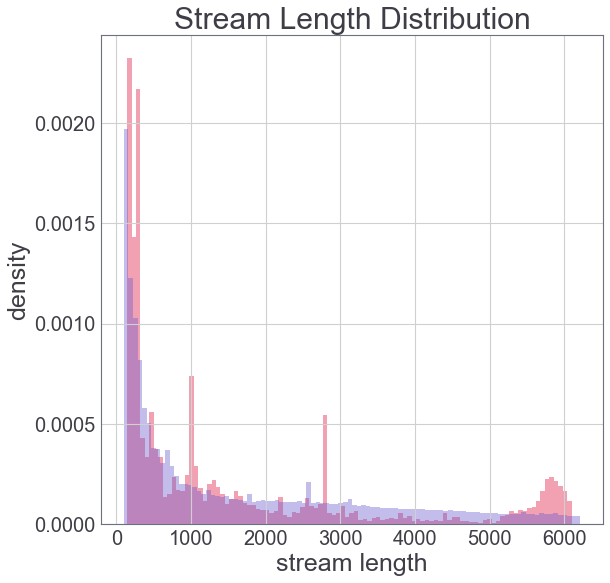

In [22]:
mal_lengths = sorted(mal_lengths)
ben_lengths = sorted(ben_lengths)
plt.figure(figsize=(9, 9))
plt.title("Stream Length Distribution", fontsize=30)
plt.hist(mal_lengths[int(len(mal_lengths) * 0.2):-int(len(mal_lengths) * 0.2)], bins=100, density=True, color='crimson', alpha=0.4)
plt.hist(ben_lengths[int(len(ben_lengths) * 0.2):-int(len(ben_lengths) * 0.2)], bins=100, density=True, color='slateblue', alpha=0.4)
plt.savefig('result_100_2.png')
plt.ylabel("density", fontsize=25)
plt.xlabel("stream length", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Stream Ratio Distribution

In [7]:
mal_ratio = []
temp = dict()
size = dict()
for path, _, files in os.walk(r'E:\Source\pdf\mal'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp[file] = path + os.sep + file
            
for path, _, files in os.walk(r'D:\Source\pdf\Malicious_PDF'):
    for file in files:
        if os.extsep not in file:
            size[file] = os.path.getsize(path + os.sep + file)
            
for abspath in tqdm(temp.values()):
    act_name = abspath.split(os.sep)[-1].split(os.extsep)[0]
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        stream_total = 0
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    stream_total += data['body'][i]['actual_length']
        mal_ratio.append(stream_total / size[act_name])

  0%|          | 0/10648 [00:00<?, ?it/s]

In [8]:
ben_ratio = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\ben'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    act_name = abspath.split(os.sep)[-1].split(os.extsep)[0] + os.extsep + 'pdf'
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        stream_total = 0
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    stream_total += data['body'][i]['actual_length']
        if os.path.getsize(r'D:\Source\pdf\Benign_PDF' + os.sep + act_name) != 0:
            ben_ratio.append(stream_total / os.path.getsize(r'D:\Source\pdf\Benign_PDF' + os.sep + act_name))

  0%|          | 0/103567 [00:00<?, ?it/s]

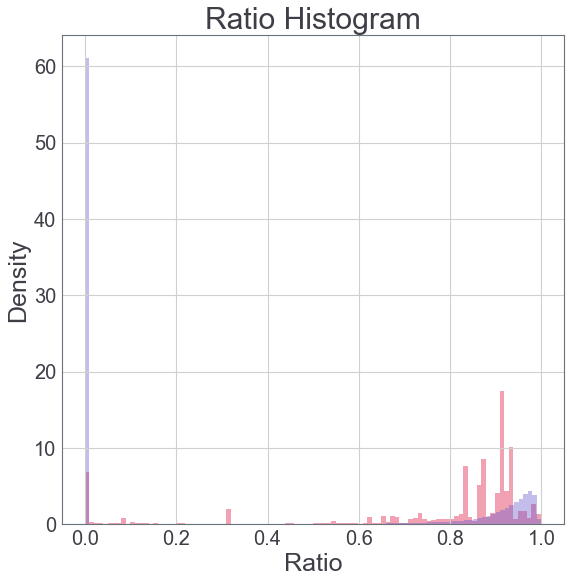

In [24]:
plt.figure(figsize=(9, 9))
plt.hist(mal_ratio, bins=100, density=True, color='crimson', alpha=0.4)
plt.hist(ben_ratio, bins=100, density=True, color='slateblue', alpha=0.4)
plt.title("Ratio Histogram", fontsize=30)
plt.ylabel("Density", fontsize=25)
plt.xlabel("Ratio", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('ratio_result_100.png')
plt.show()

### Stream STD Distribution

In [10]:
import numpy as np

In [11]:
ben_stds = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\ben'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        temp = []
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    if data['body'][i]['actual_length'] > 0:
                        temp.append(data['body'][i]['actual_length'])
        if len(temp):
            val = np.std(temp)
            if val:
                ben_stds.append(val)

  0%|          | 0/103567 [00:00<?, ?it/s]

In [12]:
mal_stds = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\mal'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        temp = []
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    if data['body'][i]['actual_length'] > 0:
                        temp.append(data['body'][i]['actual_length'])
        if len(temp):
            val = np.std(temp)
            if val:
                mal_stds.append(val)

  0%|          | 0/10648 [00:00<?, ?it/s]

In [13]:
def robust(data, amount):
    data = sorted(data)
    return data[int(len(data) * amount):-int(len(data) * amount)]

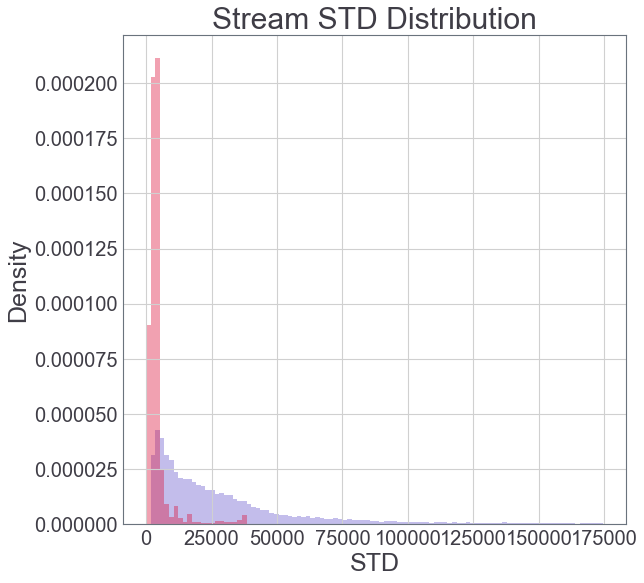

In [25]:
plt.figure(figsize=(9, 9))
ben = robust(ben_stds, 0.05)
mal = robust(mal_stds, 0.05)
range_ = (0, max(max(ben), max(mal)))
plt.hist(ben, range=range_, bins=100, density=True, color='slateblue', alpha=0.4)
plt.hist(mal, range=range_, bins=100, density=True, color='crimson', alpha=0.4)
plt.title("Stream STD Distribution" , fontsize=30)
plt.ylabel("Density", fontsize=25)
plt.xlabel("STD", fontsize=25)
plt.xticks(['0', '0.0001', '0.0002'], fontsize=20)
plt.yticks(['0', '10000', '20000'], fontsize=20)
plt.savefig('std_result_100_05.png')
plt.show()

### Stream Max Entropy Distribution

In [15]:
from collections import Counter
import math

def get_entropy(data):
    if not data:
        return 0.0
    occurrences = Counter(bytearray(data))
    entropy = 0
    for x in occurrences.values():
        p_x = float(x) / len(data)
        entropy -= p_x * math.log(p_x, 2)
    return entropy

In [17]:
import multiprocessing as mp

In [27]:
ben_entropies = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\ben'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    entropy = 0
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    stream = data['body'][i]['stream']
                    if len(stream) > 0:

                        temp = get_entropy(stream)
                        if temp > entropy:
                            entropy = temp
    if entropy:
        ben_entropies.append(entropy)

  0%|          | 0/103567 [00:00<?, ?it/s]

In [30]:
mal_entropies = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\mal'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    entropy = 0
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        for i in data['body']:
            if isinstance(i, int):
                if 'stream' in data['body'][i]:
                    stream = data['body'][i]['stream']
                    if len(stream) > 0:
                        temp = get_entropy(stream)
                        if temp > entropy:
                            entropy = temp
    if entropy:
        mal_entropies.append(entropy)

  0%|          | 0/10648 [00:00<?, ?it/s]

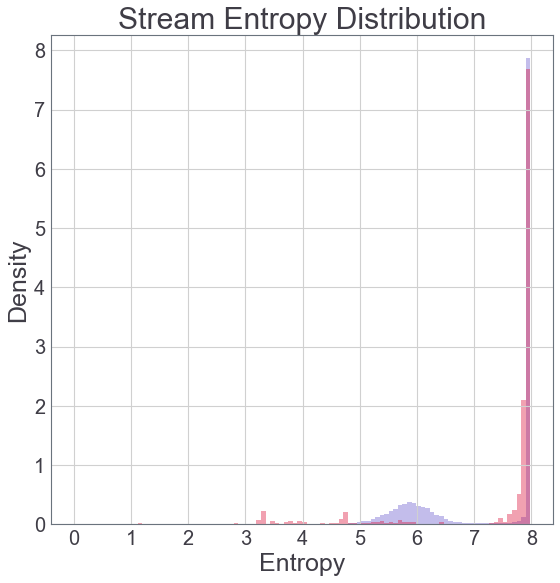

In [31]:
plt.figure(figsize=(9, 9))
ben = robust(ben_entropies, 0.05)
mal = robust(mal_entropies, 0.05)
range_ = (0, max(max(ben), max(mal)))
plt.hist(ben_entropies, range=range_, bins=100, density=True, color='slateblue', alpha=0.4)
plt.hist(mal_entropies, range=range_, bins=100, density=True, color='crimson', alpha=0.4)
plt.title("Stream Entropy Distribution"  , fontsize=30)
plt.ylabel("Density" , fontsize=25)
plt.xlabel("Entropy" , fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('entropy_result_100.png')
plt.show()

### Tag Cardinality Distribution

In [32]:
ben_cardinality = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\ben'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        for i in data['body']:
            if isinstance(i, int):
                ben_cardinality.append(len(set(data['body'][i]['tags'])))

  0%|          | 0/103567 [00:00<?, ?it/s]

In [33]:
mal_cardinality = []
temp = []
for path, _, files in os.walk(r'E:\Source\pdf\mal'):
    for file in files:
        name, ext = file.split(os.extsep)
        if ext == 'pickle':
            temp.append(path + os.sep + file)
for abspath in tqdm(temp):
    with open(abspath, 'rb') as f:
        data = pickle.load(f)
        for i in data['body']:
            if isinstance(i, int):
                mal_cardinality.append(len(set(data['body'][i]['tags'])))

  0%|          | 0/10648 [00:00<?, ?it/s]

In [34]:
plt.figure(figsize=(9, 9))
ben = robust(ben_cardinality, 0.05)
mal = robust(mal_cardinality, 0.05)
range_ = (0, max(max(ben), max(mal)))
plt.hist(ben_cardinality, range=range_, bins=10, density=True, color='slateblue', alpha=0.4)
plt.hist(mal_cardinality, range=range_, bins=10, density=True, color='crimson', alpha=0.4)
plt.title("Tag Cardinality Distribution" , fontsize=30)
plt.ylabel("Density" , fontsize=25)
plt.xlabel("Cardinality", , fontsize=25)
plt.savefig('cardinality_result_100.png' , fontsize=20)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_61772/3338740663.py, line 9)

### Simple Detector

In [ ]:
import json

total = 0


count = 0
for path, _, files in os.walk(BEN_PATH):
    for file in files:
        if 'pdfjson' in file:
            with open(path + os.sep + file, 'r', encoding='utf-8') as f:
                data = f.read()
                if "/JS" in data or "/js" in data or "/Javascript" in data or "/javascript" in data or "/JavaScript" in data:
                    count += 1
                    print(path + os.sep + file)
            total += 1
print(count, total)